In [14]:
# import libraries
import sklearn
import sklearn.datasets 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np




Number of samples: 569
target
1    357
0    212
Name: count, dtype: int64
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1  

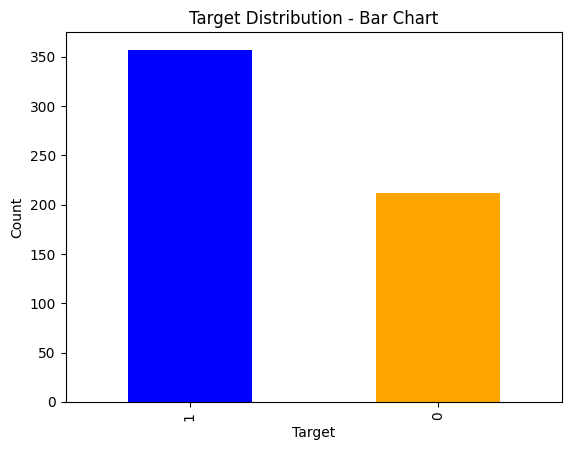

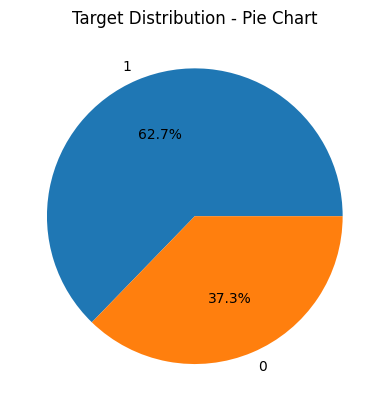

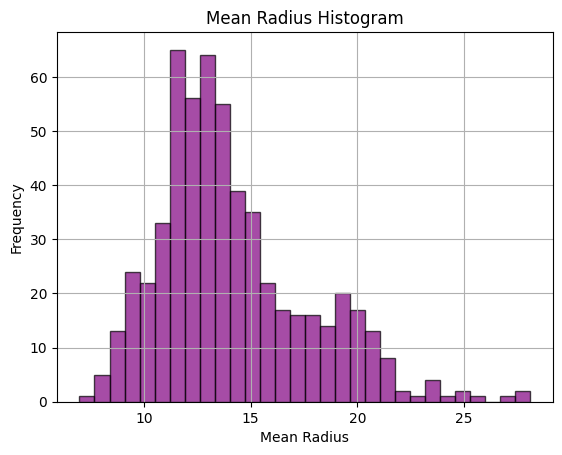

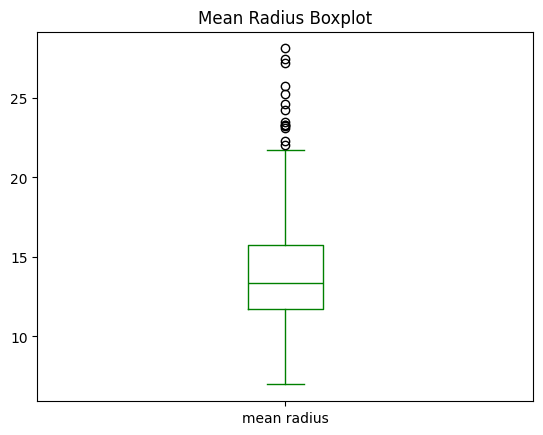

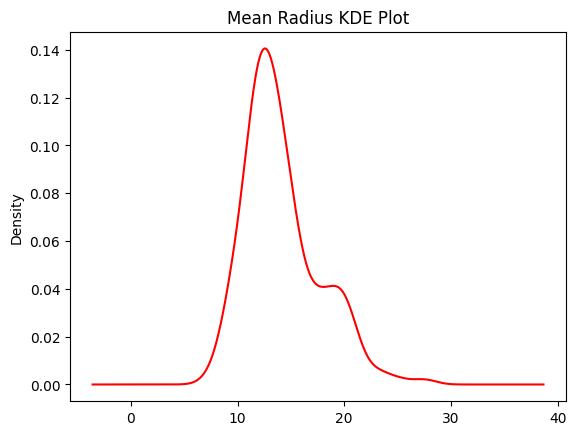

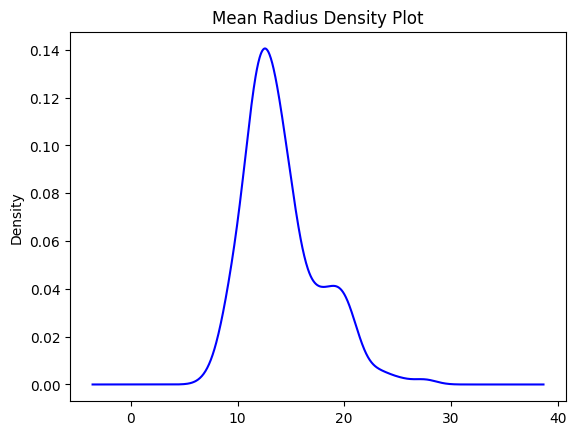

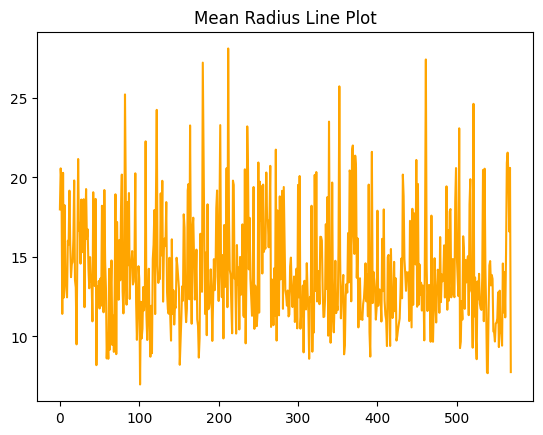

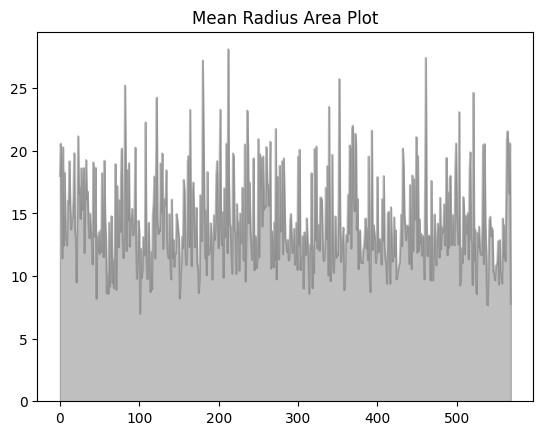

Accuracy: 97.37%
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



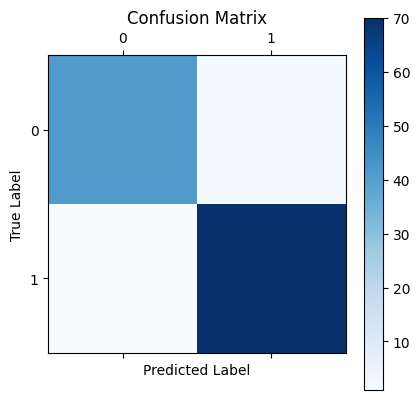

In [26]:
# Load the breast cancer dataset
data = load_breast_cancer() 
X = data.data
y = data.target


# Convert the data into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print("Number of samples:", len(df))
print(df['target'].value_counts())
print(data.feature_names)
print(df.shape)

# Print basic information about the dataset
print(df.head())
print(df.describe())
print(df.info())
print(df.shape)
print(df.columns)
print(df['target'].value_counts())
print(df.isnull().sum())
print(df.dtypes)
print(df['target'].value_counts(normalize=True))


# Visualize the data
df['target'].value_counts().plot(kind='bar', title='Target Distribution - Bar Chart', color=['blue', 'orange'])
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Target Distribution - Pie Chart')
plt.ylabel('')
plt.show()

df['mean radius'].hist(bins=30,color='purple', edgecolor='black', alpha=0.7)
plt.title("Mean Radius Histogram")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")
plt.show()

df['mean radius'].plot(kind='box', title='Mean Radius Boxplot',color='green')
plt.show()

df['mean radius'].plot(kind='kde', title='Mean Radius KDE Plot', color='red')
plt.show()

df['mean radius'].plot(kind='density', title='Mean Radius Density Plot', color='blue')
plt.show()

df['mean radius'].plot(kind='line', title='Mean Radius Line Plot', color='orange')
plt.show()

df['mean radius'].plot(kind='area', title='Mean Radius Area Plot', color='gray', alpha=0.5)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data  
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()